In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
%matplotlib inline

## Read and Inspect Dataset

Pada kasus ini kita akan melakukan read dan menginspect dataset.

In [3]:
retail_df = pd.read_excel("dataset.xlsx")

In [4]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
# Convert the date in YYYY-mm-dd HH:MM format and store that date in 'Date' column
retail_df['Date']=pd.to_datetime(retail_df['InvoiceDate'], format = '%Y-%m-%d %H:%M:%S')
#retail_df['Date']=retail_df['Date'].apply(lambda x: x.strftime('%Y-%d-%m %H:%M'))

# Count the unique no of attributes in Retail data
def unique_counts(retail_df):
   for i in retail_df.columns:
       count = retail_df[i].nunique()
       print(i, ": ", count)
unique_counts(retail_df)

InvoiceNo :  25900
StockCode :  4070
Description :  4223
Quantity :  722
InvoiceDate :  23260
UnitPrice :  1630
CustomerID :  4372
Country :  38
Date :  23260


In [9]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Date         541909 non-null  datetime64[ns]
 9   Total_Price  541909 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 41.3+ MB


In [10]:
retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Date                0
Total_Price         0
dtype: int64

In [8]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Date,Total_Price
count,541909.000000,541909,541909.000000,406829.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,2011-07-04 13:34:57.156386048,17.987795
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,2010-12-01 08:26:00,-168469.600000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,2011-03-28 11:34:00,3.400000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,2011-07-19 17:17:00,9.750000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,2011-10-19 11:27:00,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,2011-12-09 12:50:00,168469.600000
std,218.081158,NaN,96.759853,1713.600303,NaN,378.810824


## Hitung Total Price
Total price dihitung dengan cara mengalikan quanityty dengan unit price untuk mendapatkan total price yang dilakukan pada transaksi tersebut.

In [6]:
retail_df['Total_Price']=retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01 08:26:00,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01 08:34:00,54.08


In [7]:
# Hanya ambil dataset yang tidak null
online_retail_df = retail_df[np.isfinite(retail_df["CustomerID"])]

In [11]:
online_retail_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Date           0
Total_Price    0
dtype: int64

In [12]:
unique_counts(online_retail_df)

InvoiceNo :  22190
StockCode :  3684
Description :  3896
Quantity :  436
InvoiceDate :  20460
UnitPrice :  620
CustomerID :  4372
Country :  37
Date :  20460
Total_Price :  4041


In [14]:
#For the sake of calculating recency and frequency, drop the rows with negative values of Quantity and store the data in final_df
final_retail = online_retail_df[online_retail_df['Quantity'] > 0]

In [15]:
unique_counts(final_retail)

InvoiceNo :  18536
StockCode :  3665
Description :  3877
Quantity :  302
InvoiceDate :  17286
UnitPrice :  441
CustomerID :  4339
Country :  37
Date :  17286
Total_Price :  2940


## Hitung RFM Value untuk setiap Customer

In [16]:
import datetime as dt

NOW = dt.datetime(2011, 12, 10)

In [17]:
# 1. Hitung RFM 
rfmTable = final_retail.groupby('CustomerID').agg({'Date': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x),'Total_Price': lambda x: x.sum()})
# 2. Ubah Tanggal menjadi hari dalam integer
rfmTable['Date'] = rfmTable['Date'].astype(int)

# 3. Rename table
rfmTable.rename(columns={'Date': 'recency', 
                         'InvoiceNo': 'frequency',
                       'Total_Price': 'monetary_value'}, inplace=True)


In [18]:
rfmTable.shape

(4339, 3)

In [19]:
rfmTable.head(10)

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40


## Tentukan top 1 customer berdasarkan frequency dan monetary values

In [20]:
rfmTable.sort_values(['frequency', 'monetary_value'], ascending=[False, False], inplace=True)

In [22]:
rfmTable.head(10)

,recency,frequency,monetary_value
CustomerID,,,
17841.0,1,7847,40991.57
14911.0,1,5677,143825.06
14096.0,4,5111,65164.79
12748.0,0,4596,33719.73
14606.0,1,2700,12156.65
15311.0,0,2379,60767.90
14646.0,1,2080,280206.02
13089.0,2,1818,58825.83
13263.0,1,1677,7454.07


## Find Optimal Cluster dengan dendograms dan elbow methods

In [23]:
# Normalising the features


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( rfmTable )

In [24]:
X_scaled[:10]

array([[-0.91044914, 33.90046966,  4.3325755 ],
       [-0.91044914, 24.41481448, 15.7747762 ],
       [-0.88044801, 21.94067585,  7.02231048],
       [-0.92044952, 19.68947197,  3.52344364],
       [-0.91044914, 11.40154469,  1.12413687],
       [-0.92044952,  9.99836713,  6.53307202],
       [-0.91044914,  8.6913575 , 30.94977723],
       [-0.90044877,  7.54608484,  6.31697943],
       [-0.91044914,  6.92973582,  0.60088453],
       [-0.84044651,  6.75488503,  5.5048778 ]])

In [25]:
clusters = KMeans(3)  # 3 clusters
clusters.fit( X_scaled )

/home/kal/miniconda3/envs/computer-vision/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [26]:
import random
random.seed(9008)
X_sample = np.array(random.sample(X_scaled.tolist(),20))
#type(X_scaled)

In [28]:
rfmTable["cluster_new"] = clusters.labels_

In [29]:
rfmTable.groupby('cluster_new' ).mean()

,recency,frequency,monetary_value
cluster_new,,,
0,40.898644,103.079174,2028.480799
1,246.813889,27.750926,636.501112
2,4.000000,2566.000000,126118.310000


In [30]:
rfmTable.drop( 'cluster_new', axis = 1, inplace = True )

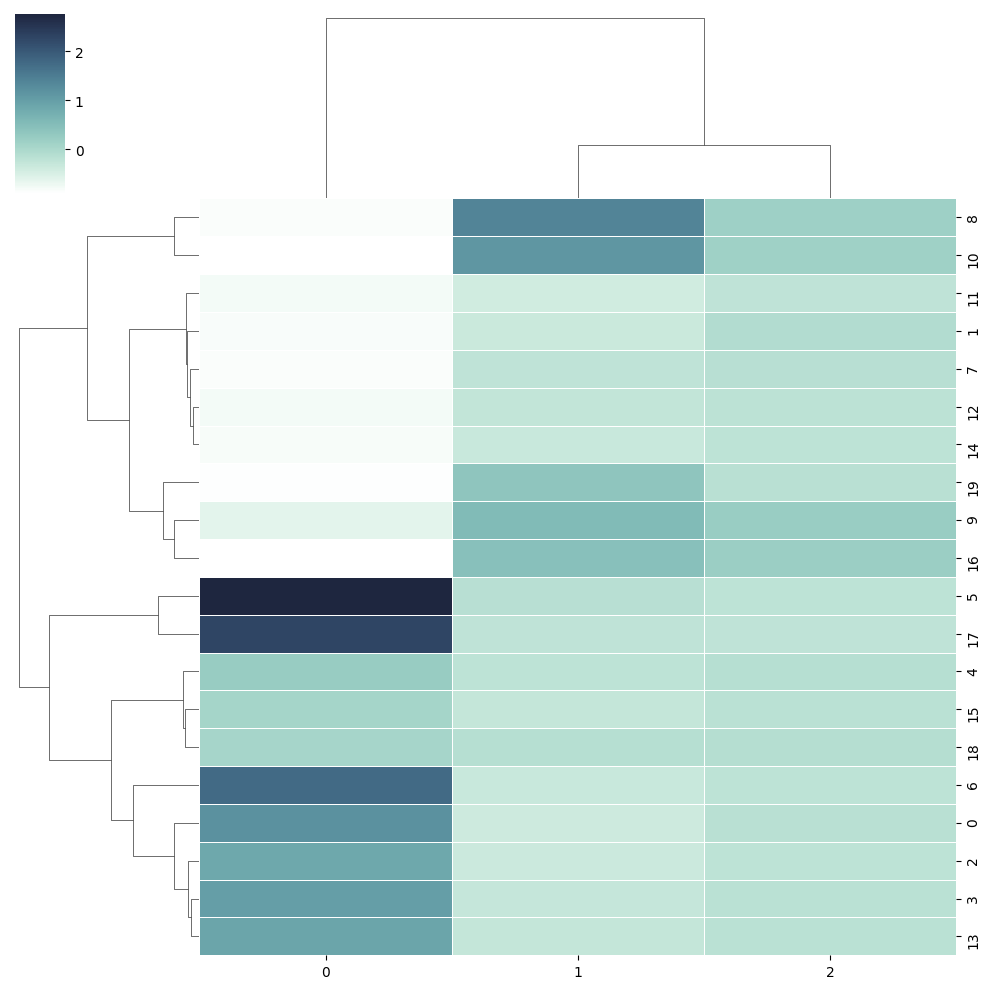

In [31]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sn.clustermap(X_sample, cmap=cmap, linewidths=.5)

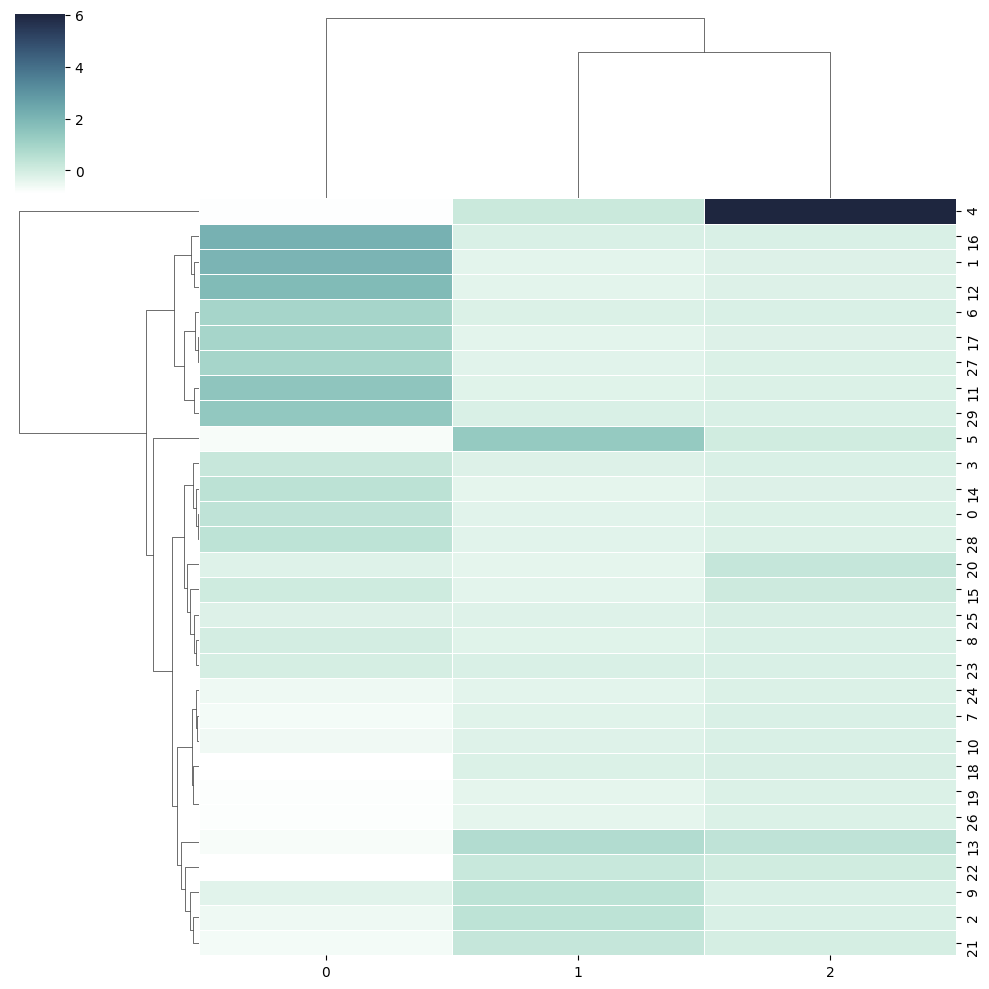

In [32]:
#Lets take one more sample to validate dendogram
random.seed(9005)
X_sample = np.array(random.sample(X_scaled.tolist(),30))
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sn.clustermap(X_sample, cmap=cmap, linewidths=.5)

The dendogram shows there are 3-6 disctinct clusters.

## Find Optimum Threshold dengan Elbow Methods

In [33]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )


/home/kal/miniconda3/envs/computer-vision/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kal/miniconda3/envs/computer-vision/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kal/miniconda3/envs/computer-vision/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kal/miniconda3/envs/computer-vision/lib/python3.12/site-packages/sklearn/cluster/_kme

In [34]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [35]:
clusters_df.head(10)

,num_clusters,cluster_errors
0,1,13017.000000
1,2,8996.762762
2,3,5453.134853
3,4,4000.659974
4,5,2958.445965
5,6,2372.989895
6,7,1923.406286
7,8,1674.152994
8,9,1492.511540


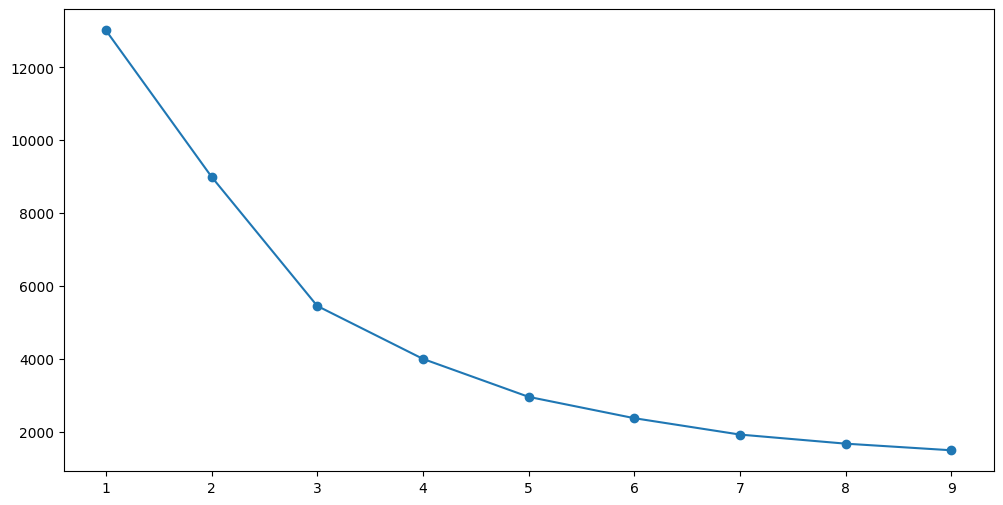

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [38]:
clusters = KMeans(3)  # 3 clusters
clusters.fit( X_scaled )
rfmTable["cluster_label"] = clusters.labels_

/home/kal/miniconda3/envs/computer-vision/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
rfmTable.groupby('cluster_label').mean()

,recency,frequency,monetary_value
cluster_label,,,
0,40.898644,103.079174,2028.480799
1,246.813889,27.750926,636.501112
2,4.000000,2566.000000,126118.310000


In [41]:
rfmTable_0 = rfmTable[rfmTable.cluster_label == 0]

In [42]:

rfmTable_0.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
14606.0,1,2700,12156.65,0
13263.0,1,1677,7454.07,0
14298.0,8,1637,51527.30,0
15039.0,9,1502,19914.44,0
18118.0,10,1279,5653.82,0
14159.0,19,1204,4693.01,0
14796.0,1,1141,8022.49,0
16033.0,5,1137,8816.40,0
15005.0,15,1119,6316.57,0



All the customers with high recency and low frequency and low monetary value are segmented in this cluster.These are the least profitable customers for the company.

In [43]:
rfmTable_1 = rfmTable[rfmTable.cluster_label == 1]
rfmTable_1.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
17850.0,372,297,5391.21,1
15644.0,166,238,813.00,1
14573.0,179,235,1653.42,1
15808.0,306,208,3734.97,1
15379.0,169,194,3703.29,1
17341.0,156,183,781.36,1
17472.0,191,181,710.29,1
14669.0,241,170,1269.99,1
15574.0,177,168,702.25,1


Each customer is assigned with the cluster label.

This cluster has customers that are potential customers with decent frequency and monetary value.Company should work towards them to convert them to most profitable customers

In [44]:
rfmTable_2 = rfmTable[rfmTable.cluster_label == 2]
rfmTable_2.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
17841.0,1,7847,40991.57,2
14911.0,1,5677,143825.06,2
14096.0,4,5111,65164.79,2
12748.0,0,4596,33719.73,2
15311.0,0,2379,60767.90,2
14646.0,1,2080,280206.02,2
13089.0,2,1818,58825.83,2
14156.0,9,1400,117379.63,2
17511.0,2,963,91062.38,2



Each customer is assigned with the cluster label.

All the customers with low recency and high frequency and and monetary value are segmented in this Cluster .These are the most profitable and highly valued customers company should look at.

In [45]:
rfmTable_0.mean()

recency             40.898644
frequency          103.079174
monetary_value    2028.480799
cluster_label        0.000000
dtype: float64

In [46]:
rfmTable_1.mean()

recency           246.813889
frequency          27.750926
monetary_value    636.501112
cluster_label       1.000000
dtype: float64

In [48]:
rfmTable_2.mean()

recency                4.00
frequency           2566.00
monetary_value    126118.31
cluster_label          2.00
dtype: float64

In [50]:
clusters = KMeans(5)  # 5 clusters
clusters.fit( X_scaled )

/home/kal/miniconda3/envs/computer-vision/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [51]:
rfmTable.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
17841.0,1,7847,40991.57,2
14911.0,1,5677,143825.06,2
14096.0,4,5111,65164.79,2
12748.0,0,4596,33719.73,2
14606.0,1,2700,12156.65,0
15311.0,0,2379,60767.90,2
14646.0,1,2080,280206.02,2
13089.0,2,1818,58825.83,2
13263.0,1,1677,7454.07,0


In [52]:
rfmTable.groupby('cluster_label').mean()

,recency,frequency,monetary_value
cluster_label,,,
0,40.898644,103.079174,2028.480799
1,246.813889,27.750926,636.501112
2,4.000000,2566.000000,126118.310000
